In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv("loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# Preprocessing:

In [22]:
print(f"shape of data :{data.shape}")
print(f"dataset info :{data.info}")
print(f"Summary stastics: {data.describe(include='all')}")
print(f"missing valuse :\n{data.isnull().sum()}")
print(f"data types :\n{data.dtypes}")

shape of data :(4269, 13)
dataset info :<bound method DataFrame.info of       loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
...       ...               ...           ...           ...           ...   
4264     4265                 5      Graduate           Yes       1000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4266     4267                 2  Not Graduate            No       6500000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

   

In [23]:
# Encoding Categorical values:
df=data.copy()
# get dummies:
df=pd.get_dummies(df,columns=['education','self_employed','loan_status'])
print(df.columns)
df.drop(columns=['education_Not Graduate'], inplace=True)
df.drop(columns=['self_employed_No'], inplace=True)
df.drop(columns=['loan_status_Rejected'], inplace=True)


df.head()


Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'education_Graduate', 'education_Not Graduate', 'self_employed_No',
       'self_employed_Yes', 'loan_status_Approved', 'loan_status_Rejected'],
      dtype='object')


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Graduate,self_employed_Yes,loan_status_Approved
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False


In [24]:
# encoding dumies to 0 and 1:
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
df['loanApproved']=lable_encoder.fit_transform(df['loan_status_Approved'])
df['selfemployed']=lable_encoder.fit_transform(df['self_employed_Yes'])
df['Graduate']=lable_encoder.fit_transform(df['education_Graduate'])
df.drop(columns=['loan_status_Approved'], inplace=True)
df.drop(columns=['self_employed_Yes'], inplace=True)
df.drop(columns=['education_Graduate'], inplace=True)
df.head(10)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loanApproved,selfemployed,Graduate
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0
5,6,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0,1,1
6,7,5,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1,0,1
7,8,2,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0,1,1
8,9,0,800000,2200000,20,782,1300000,800000,2800000,600000,1,1,1
9,10,5,1100000,4300000,10,388,3200000,1400000,3300000,1600000,0,0,0


In [25]:
df.columns

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loanApproved', 'selfemployed', 'Graduate'],
      dtype='object')

In [26]:
# Deciding features:
X_feature = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
    'cibil_score', 'residential_assets_value', 'commercial_assets_value',
    'luxury_assets_value', 'bank_asset_value', 'selfemployed', 'Graduate'
]

y_feature = 'loanApproved'

print(df[X_feature].head())
print(df[y_feature].head())



   no_of_dependents  income_annum  loan_amount  loan_term  cibil_score  \
0                 2       9600000     29900000         12          778   
1                 0       4100000     12200000          8          417   
2                 3       9100000     29700000         20          506   
3                 3       8200000     30700000          8          467   
4                 5       9800000     24200000         20          382   

   residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                   2400000                 17600000             22700000   
1                   2700000                  2200000              8800000   
2                   7100000                  4500000             33300000   
3                  18200000                  3300000             23300000   
4                  12400000                  8200000             29400000   

   bank_asset_value  selfemployed  Graduate  
0           8000000             0         1  


In [27]:
# feature scaling:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[X_feature])
y = df[y_feature]
print(X)
print(X.shape)
print(y)

[[-0.2941017   1.61797904  1.63305171 ...  0.93030441 -1.00728821
   0.99555917]
 [-1.4735476  -0.34174956 -0.32441406 ... -0.51593638  0.99276452
  -1.00446064]
 [ 0.29562125  1.4398219   1.61093345 ...  2.40731629 -1.00728821
   0.99555917]
 ...
 [-0.2941017   0.51340474  0.96950399 ...  0.71490685 -1.00728821
  -1.00446064]
 [-0.88382465 -0.34174956 -0.25805929 ...  0.25334064 -1.00728821
  -1.00446064]
 [-0.88382465  1.47545332  1.61093345 ...  2.16114764 -1.00728821
   0.99555917]]
(4269, 11)
0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loanApproved, Length: 4269, dtype: int64


In [28]:
# Spliting the data:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# ANN

In [29]:
# defining model:
model = Sequential([
    Dense(15, activation='relu', input_shape=(11,)),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\dhrub\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-3)),  # type: ignore # Adaptive moment estimation
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [31]:
# model training:
print(f"Model summary:\n{model.summary()}")
history=model.fit(X_train,y_train,epochs=50,batch_size=500,validation_split=0.2,verbose=1)
print(f"Keys on history :{history.history.keys()}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

Model summary:
None
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6160 - loss: 0.7289 - val_accuracy: 0.6149 - val_loss: 0.7176
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6175 - loss: 0.7008 - val_accuracy: 0.6135 - val_loss: 0.6929
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6215 - loss: 0.6778 - val_accuracy: 0.6105 - val_loss: 0.6714
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6351 - loss: 0.6576 - val_accuracy: 0.6237 - val_loss: 0.6528
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6479 - loss: 0.6400 - val_accuracy: 0.6325 - val_loss: 0.6361
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6629 - loss: 0.6238 - val_accuracy: 0.6647 - val_loss: 0.6202
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6761 - loss: 0.6084 - val_accuracy: 0.6764 - val_loss: 0.6048
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6848 - loss: 0.5935 - val_accuracy: 0.6837

In [32]:
# predict
y_pred = model.predict(X_test) # 0 to 1
y_pred_classes = (y_pred > 0.7).astype(int)
print(y_pred_classes.sum())
print(y_test.sum())

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
480
536


In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
# Evaluation from actual vs predicted:
# evaluation
print("accuarcy=",accuracy_score(y_test,y_pred_classes))
print("precision=",precision_score(y_test,y_pred_classes))
print("recall=",recall_score(y_test,y_pred_classes))
print("F1 score=",f1_score(y_test,y_pred_classes))

accuarcy= 0.9063231850117096
precision= 0.975
recall= 0.8731343283582089
F1 score= 0.9212598425196851


[[306  12]
 [ 68 468]]


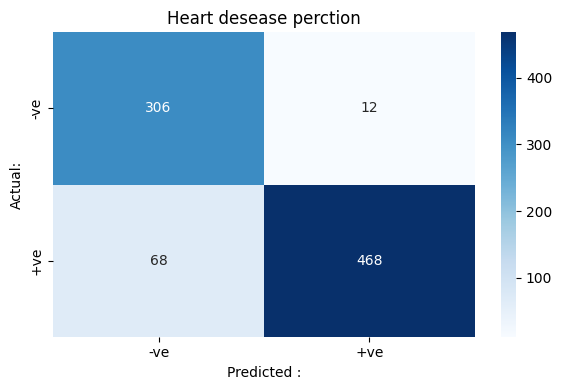

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# confusion metrics:
confu_matrix=confusion_matrix(y_test,y_pred_classes) # actual,prediction
print(confu_matrix)
# ploting 
plt.figure(figsize=(6,4))
sns.heatmap(confu_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["-ve","+ve"],yticklabels=["-ve","+ve"])
plt.xlabel("Predicted :")
plt.ylabel("Actual:")
plt.title("Heart desease perction")
plt.tight_layout()
plt.show()

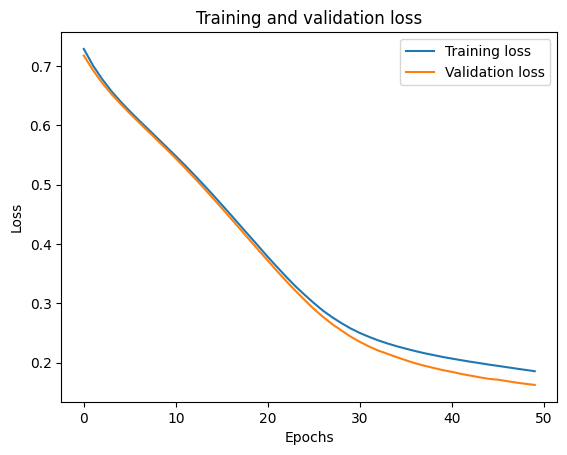

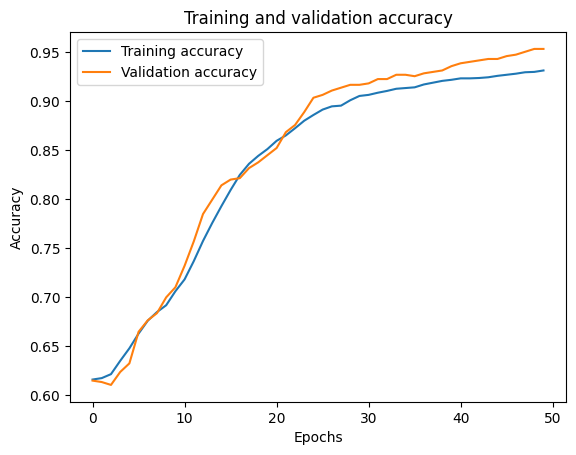

In [35]:
# ploting loss on trainging vs loss on validation
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# ploting accuracy on training vs acccuracy on validation
plt.figure()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
# Save
model.save("loan_model_keras.h5")

# Load
from tensorflow.keras.models import load_model # type: ignore
model_loaded = load_model("loan_model_keras.h5")


In [37]:
import pandas as pd

def loan_prediction():
    print("\nEnter Applicant Details")

    no_of_dependents = int(input("Dependents: "))
    income_annum = float(input("Annual Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_term = int(input("Loan Term (years): "))
    cibil_score = int(input("CIBIL Score: "))
    residential_assets_value = float(input("Residential Assets Value: "))
    commercial_assets_value = float(input("Commercial Assets Value: "))
    luxury_assets_value = float(input("Luxury Assets Value: "))
    bank_asset_value = float(input("Bank Asset Value: "))
    selfemployed = int(input("Self Employed? (1=Yes, 0=No): "))
    graduate = int(input("Graduate? (1=Yes, 0=No): "))

    user_df = pd.DataFrame([[no_of_dependents, income_annum, loan_amount, loan_term,
                             cibil_score, residential_assets_value, commercial_assets_value,
                             luxury_assets_value, bank_asset_value, selfemployed, graduate]],
                           columns=X_feature)

    user_scaled = scaler.transform(user_df)

    y_pred = model.predict(user_scaled) # 0 to 1
    y_pred_classes = (y_pred > 0.5).astype(int)

    print("\n-----------------------------")
    if y_pred_classes == 1:
        print("Loan Status: APPROVED")
    else:
        print("Loan Status: REJECTED")
    print("-----------------------------")
loan_prediction()



Enter Applicant Details


ValueError: invalid literal for int() with base 10: ''

In [ ]:
import pandas as pd

# ----------------------------
# Feature list (must match training)
# ----------------------------
X_feature = [
    'no_of_dependents','income_annum','loan_amount','loan_term','cibil_score',
    'residential_assets_value','commercial_assets_value','luxury_assets_value',
    'bank_asset_value','selfemployed','Graduate'
]

# ----------------------------
# Applicant data (your values)
# ----------------------------
applicant_approved = pd.DataFrame([[
    2,          # no_of_dependents
    9600000,    # income_annum
    29900000,   # loan_amount
    12,         # loan_term
    778,        # cibil_score
    2400000,    # residential_assets_value
    17600000,   # commercial_assets_value
    22700000,   # luxury_assets_value
    8000000,    # bank_asset_value
    0,          # selfemployed
    1           # Graduate
]], columns=X_feature)

# ----------------------------
# Scale using trained scaler
# ----------------------------
applicant_scaled = scaler.transform(applicant_approved)

# ----------------------------
# Prediction
# ----------------------------
y_pred = model_loaded.predict(applicant_scaled) # 0 to 1
y_pred_classes = (y_pred > 0.5).astype(int)

print("\n-----------------------------")
if y_pred_classes == 1:
    print("Loan Status: APPROVED")
else:
    print("Loan Status: REJECTED")
print("-----------------------------")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

-----------------------------
Loan Status: APPROVED
-----------------------------


In [40]:
import pandas as pd

# ----------------------------
# Feature list (must match training)
# ----------------------------
X_feature = [
    'no_of_dependents','income_annum','loan_amount','loan_term','cibil_score',
    'residential_assets_value','commercial_assets_value','luxury_assets_value',
    'bank_asset_value','selfemployed','Graduate'
]

# ----------------------------
# Applicant data (your values)
# ----------------------------
applicant_not_approved = pd.DataFrame([[
    5,          # no_of_dependents
    9800000,    # income_annum
    24200000,   # loan_amount
    20,         # loan_term
    382,        # cibil_score (very low)
    12400000,   # residential_assets_value
    8200000,    # commercial_assets_value
    29400000,   # luxury_assets_value
    5000000,    # bank_asset_value
    1,          # selfemployed
    0           # Graduate
]], columns=X_feature)

# ----------------------------
# Scale using trained scaler
# ----------------------------
applicant_scaled = scaler.transform(applicant_not_approved)

# ----------------------------
# Prediction
# ----------------------------
y_pred = model_loaded.predict(applicant_scaled) # 0 to 1
y_pred_classes = (y_pred > 0.5).astype(int)

print("\n-----------------------------")
if y_pred_classes == 1:
    print("Loan Status: APPROVED")
else:
    print("Loan Status: REJECTED")
print("-----------------------------")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

-----------------------------
Loan Status: REJECTED
-----------------------------
